In [2]:
!pip install pandas-profiling[notebook,html]

  Using cached https://files.pythonhosted.org/packages/1d/08/1f614fb2d31b59cd69896b900044c8d7119389b9151983a872d047ea021f/pandas-profiling-2.4.0.tar.gz
    100% |████████████████████████████████| 614kB 5.6MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 6.5MB/s ta 0:00:011
    100% |████████████████████████████████| 92kB 8.1MB/s ta 0:00:011


  Running setup.py bdist_wheel for pandas-profiling ... done
  Stored in directory: /Users/karanmaheshwari/Library/Caches/pip/wheels/b2/4b/40/ff4633a59f4e7fbdfec19b8e10e353b54b5eef125c31afe51a
  Running setup.py bdist_wheel for confuse ... done
  Stored in directory: /Users/karanmaheshwari/Library/Caches/pip/wheels/b0/b2/96/2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
  Running setup.py bdist_wheel for htmlmin ... done
  Stored in directory: /Users/karanmaheshwari/Library/Caches/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built pandas-profiling confuse htmlmin
  Found existing installation: jupyter-core 4.4.0
    Uninstalling jupyter-core-4.4.0:
      Successfully uninstalled jupyter-core-4.4.0
  Found existing installation: jupyter-client 5.2.4
    Uninstalling jupyter-client-5.2.4:
      Successfully uninstalled jupyter-client-5.2.4


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

pd.set_option('display.max_columns', None)

In [15]:
data = pd.read_csv('sales_data_sample.csv', encoding='unicode_escape')

In [18]:
data.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,Motorcycles,95,S10_1678,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,Motorcycles,95,S10_1678,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,Motorcycles,95,S10_1678,Mini Wheels Co.,6505555787,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,Motorcycles,95,S10_1678,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
ORDERNUMBER         2823 non-null int64
QUANTITYORDERED     2823 non-null int64
PRICEEACH           2823 non-null float64
ORDERLINENUMBER     2823 non-null int64
SALES               2823 non-null float64
ORDERDATE           2823 non-null object
STATUS              2823 non-null object
QTR_ID              2823 non-null int64
MONTH_ID            2823 non-null int64
YEAR_ID             2823 non-null int64
PRODUCTLINE         2823 non-null object
MSRP                2823 non-null int64
PRODUCTCODE         2823 non-null object
CUSTOMERNAME        2823 non-null object
PHONE               2823 non-null object
ADDRESSLINE1        2823 non-null object
ADDRESSLINE2        302 non-null object
CITY                2823 non-null object
STATE               1337 non-null object
POSTALCODE          2747 non-null object
COUNTRY             2823 non-null object
TERRITORY           1749 non-null obje

In [19]:
drop = ['PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'TERRITORY', 'CONTACTLASTNAME'
       ,'CONTACTFIRSTNAME']
data = data.drop(columns=drop)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 16 columns):
ORDERNUMBER        2823 non-null int64
QUANTITYORDERED    2823 non-null int64
PRICEEACH          2823 non-null float64
ORDERLINENUMBER    2823 non-null int64
SALES              2823 non-null float64
ORDERDATE          2823 non-null object
STATUS             2823 non-null object
QTR_ID             2823 non-null int64
MONTH_ID           2823 non-null int64
YEAR_ID            2823 non-null int64
PRODUCTLINE        2823 non-null object
MSRP               2823 non-null int64
PRODUCTCODE        2823 non-null object
CUSTOMERNAME       2823 non-null object
COUNTRY            2823 non-null object
DEALSIZE           2823 non-null object
dtypes: float64(2), int64(7), object(7)
memory usage: 353.0+ KB


In [27]:
data['PRODUCTCODE'][:].apply(lambda x: x[:3]).value_counts()

S18    995
S24    731
S70    313
S12    259
S32    206
S10    161
S50    105
S72     53
Name: PRODUCTCODE, dtype: int64

In [28]:
data['PRODUCTINI'] = data['PRODUCTCODE'][:].apply(lambda x: x[:3])
data = data.drop(columns=["PRODUCTCODE"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 16 columns):
ORDERNUMBER        2823 non-null int64
QUANTITYORDERED    2823 non-null int64
PRICEEACH          2823 non-null float64
ORDERLINENUMBER    2823 non-null int64
SALES              2823 non-null float64
ORDERDATE          2823 non-null object
STATUS             2823 non-null object
QTR_ID             2823 non-null int64
MONTH_ID           2823 non-null int64
YEAR_ID            2823 non-null int64
PRODUCTLINE        2823 non-null object
MSRP               2823 non-null int64
CUSTOMERNAME       2823 non-null object
COUNTRY            2823 non-null object
DEALSIZE           2823 non-null object
PRODUCTINI         2823 non-null object
dtypes: float64(2), int64(7), object(7)
memory usage: 353.0+ KB


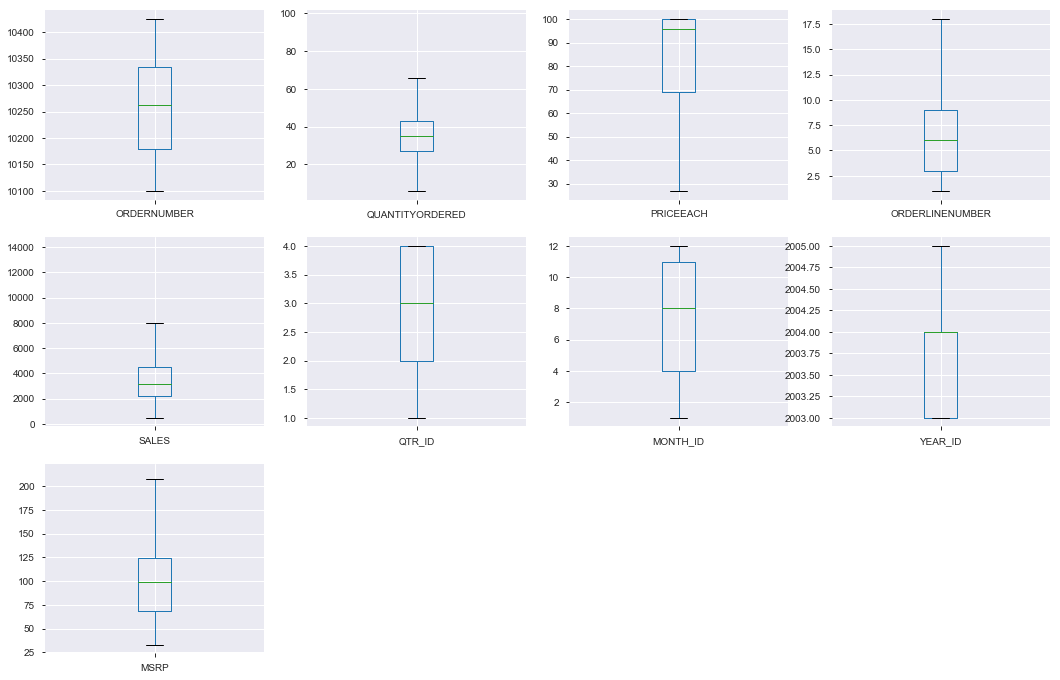

In [36]:
plt.rcParams['figure.figsize'] = [18,16]
data.plot(kind="box",subplots=True, layout=(4,4), sharex=False, sharey= False)
plt.show()

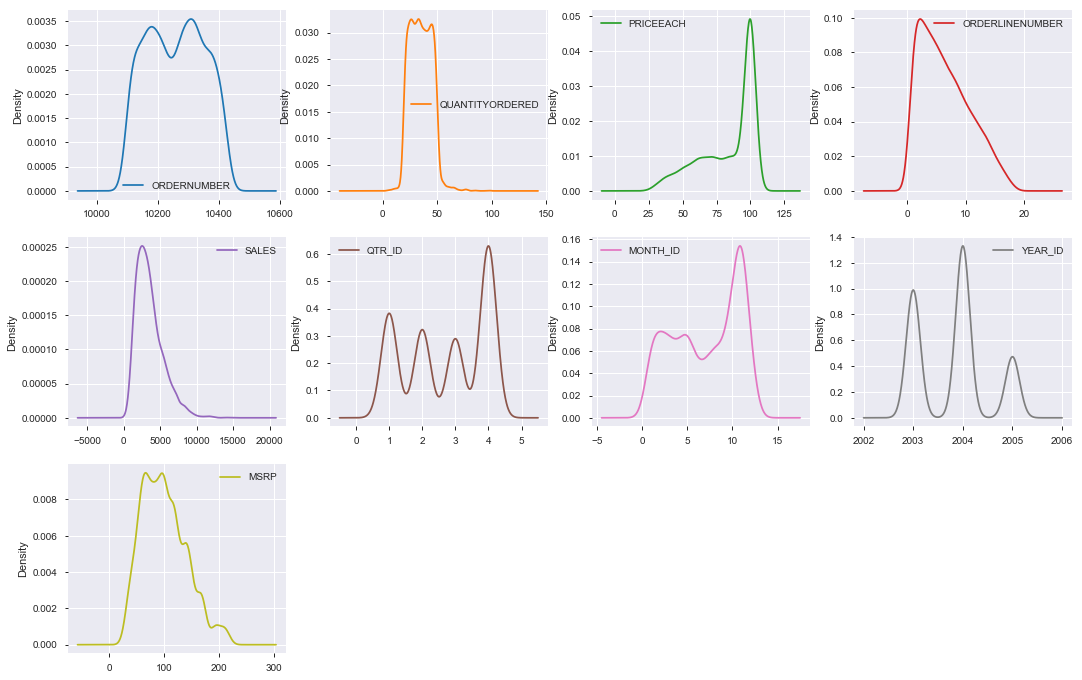

In [37]:
plt.rcParams['figure.figsize'] = [18,16]
data.plot(kind="density",subplots=True, layout=(4,4), sharex=False, sharey= False)
plt.show()

In [39]:
data.isnull().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
CUSTOMERNAME       0
COUNTRY            0
DEALSIZE           0
PRODUCTINI         0
dtype: int64

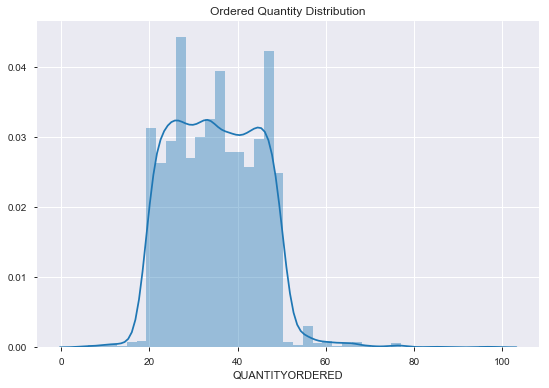

In [107]:
plt.figure(figsize=(9,6))
sns.distplot(data['QUANTITYORDERED'])
plt.title('Ordered Quantity Distribution')
plt.show()

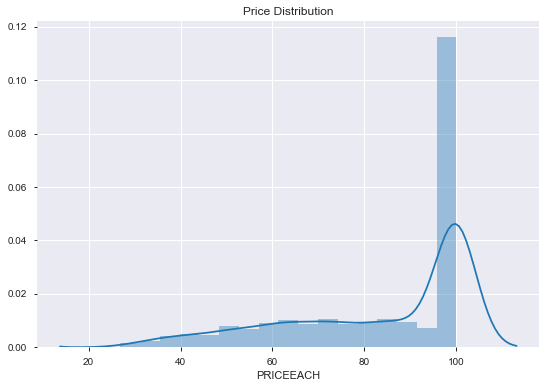

In [108]:
plt.figure(figsize=(9,6))
sns.distplot(data['PRICEEACH'])
plt.title('Price Distribution')
plt.show()

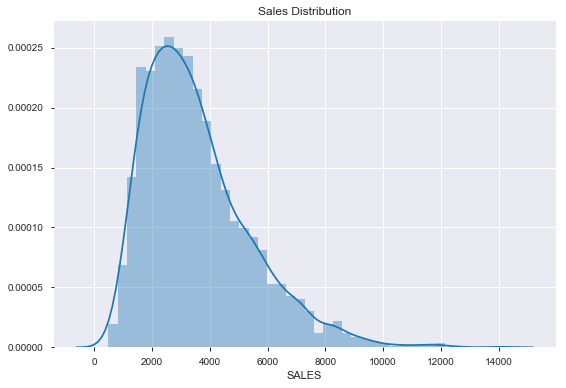

In [109]:
plt.figure(figsize=(9,6))
sns.distplot(data['SALES'])
plt.title('Sales Distribution')
plt.show()

In [111]:
data.groupby(['YEAR_ID'])['MONTH_ID'].nunique()

YEAR_ID
2003    12
2004    12
2005     5
Name: MONTH_ID, dtype: int64

In [110]:
data['STATUS'].value_counts(normalize = True)

Shipped       0.927028
Cancelled     0.021254
Resolved      0.016649
On Hold       0.015586
In Process    0.014524
Disputed      0.004959
Name: STATUS, dtype: float64

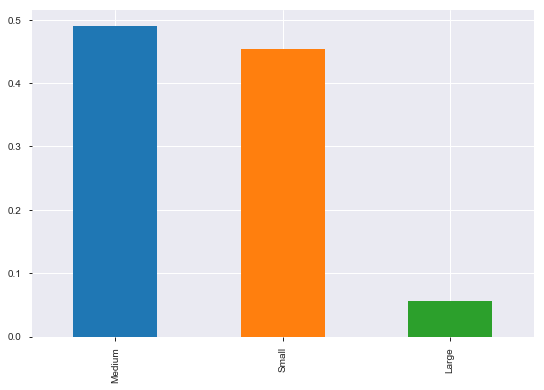

In [114]:
plt.figure(figsize=(9,6))
data['DEALSIZE'].value_counts(normalize=True).plot(kind='bar');

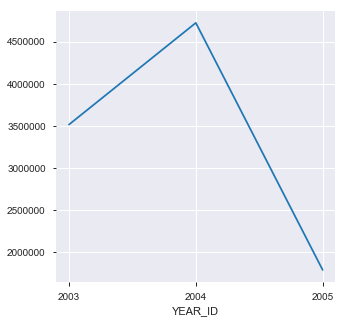

In [122]:
#Annual Revenue
plt.figure(figsize=(5,5))
data.groupby(['YEAR_ID']).sum()['SALES'].plot()
plt.xticks(np.arange(2003,2006,1));

In [130]:
monthly_revenue

,YEAR_ID,MONTH_ID,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MSRP
0,2003,1,394008,1357,3203.31,250,129753.60,39,3950
1,2003,2,414339,1449,3441.55,327,140836.19,41,4038
2,2003,3,505484,1755,4086.67,327,174504.90,50,5003
3,2003,4,586819,1993,4925.11,375,201609.55,116,5810
4,2003,5,587175,2017,4753.17,425,192673.11,116,5900
5,2003,6,465950,1649,3879.33,250,168082.56,92,4519
6,2003,7,506841,1725,4310.41,299,187731.88,150,5349
7,2003,8,588293,1974,4826.26,454,197809.30,174,5695
8,2003,9,771377,2510,6407.33,462,263973.36,228,7958
9,2003,10,1609144,5515,13367.06,1087,568290.97,632,15916


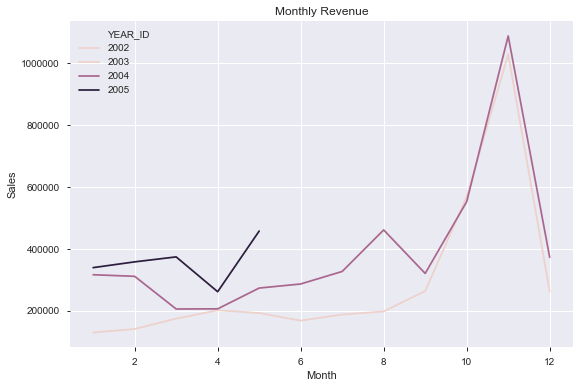

In [132]:
#Monthly revenue

plt.figure(figsize=(9,6))

monthly_revenue = data.groupby(['YEAR_ID','MONTH_ID']).sum().reset_index()
sns.lineplot(x ='MONTH_ID', y='SALES', hue='YEAR_ID', data=monthly_revenue)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Revenue")
plt.show()

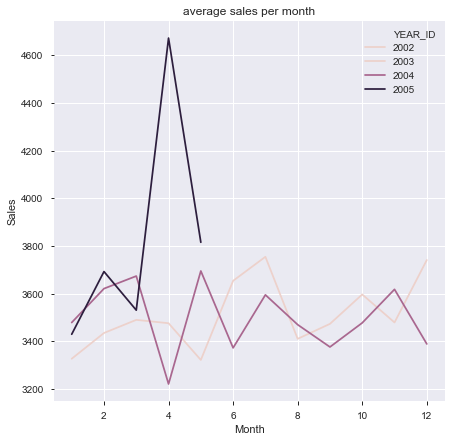

In [169]:
avg_revenue = data.groupby(['YEAR_ID','MONTH_ID']).mean().reset_index()
plt.figure(figsize=(7,7))
sns.lineplot(y='SALES',x='MONTH_ID',hue='YEAR_ID',data=avg_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('average sales per month')
plt.show()

In [182]:
monthly_revenue['growth'] = monthly_revenue['SALES'].pct_change()
monthly_revenue.head(5)

,YEAR_ID,MONTH_ID,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MSRP,growth
0,2003,1,394008,1357,3203.31,250,129753.60,39,3950,NaN
1,2003,2,414339,1449,3441.55,327,140836.19,41,4038,0.085413
2,2003,3,505484,1755,4086.67,327,174504.90,50,5003,0.239063
3,2003,4,586819,1993,4925.11,375,201609.55,116,5810,0.155323
4,2003,5,587175,2017,4753.17,425,192673.11,116,5900,-0.044325


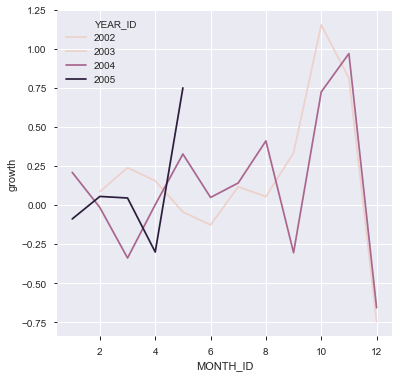

In [138]:
#Monthly sales Growth Rate

plt.figure(figsize=(6,6))
sns.lineplot(x='MONTH_ID',y='growth',hue='YEAR_ID',data=monthly_revenue)

In [142]:
data.groupby(['COUNTRY']).sum()['SALES']

COUNTRY
Australia       630623.10
Austria         202062.53
Belgium         108412.62
Canada          224078.56
Denmark         245637.15
Finland         329581.91
France         1110916.52
Germany         220472.09
Ireland          57756.43
Italy           374674.31
Japan           188167.81
Norway          307463.70
Philippines      94015.73
Singapore       288488.41
Spain          1215686.92
Sweden          210014.21
Switzerland     117713.56
UK              478880.46
USA            3627982.83
Name: SALES, dtype: float64

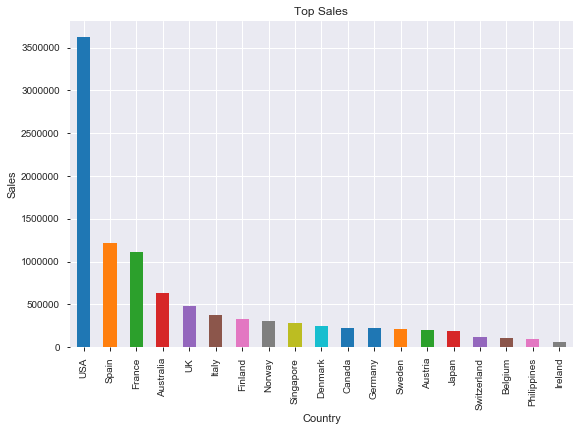

In [143]:
plt.figure(figsize=(9,6))

top_country = data.groupby(['COUNTRY']).sum()['SALES'].sort_values(ascending=False)
top_country.plot(kind='bar')
#sns.lineplot(x ='COUNTRY', y='SALES', hue='YEAR_ID', data=monthly_revenue)
plt.xlabel("Country")
plt.ylabel("Sales")
plt.title("Top Sales")
plt.show()

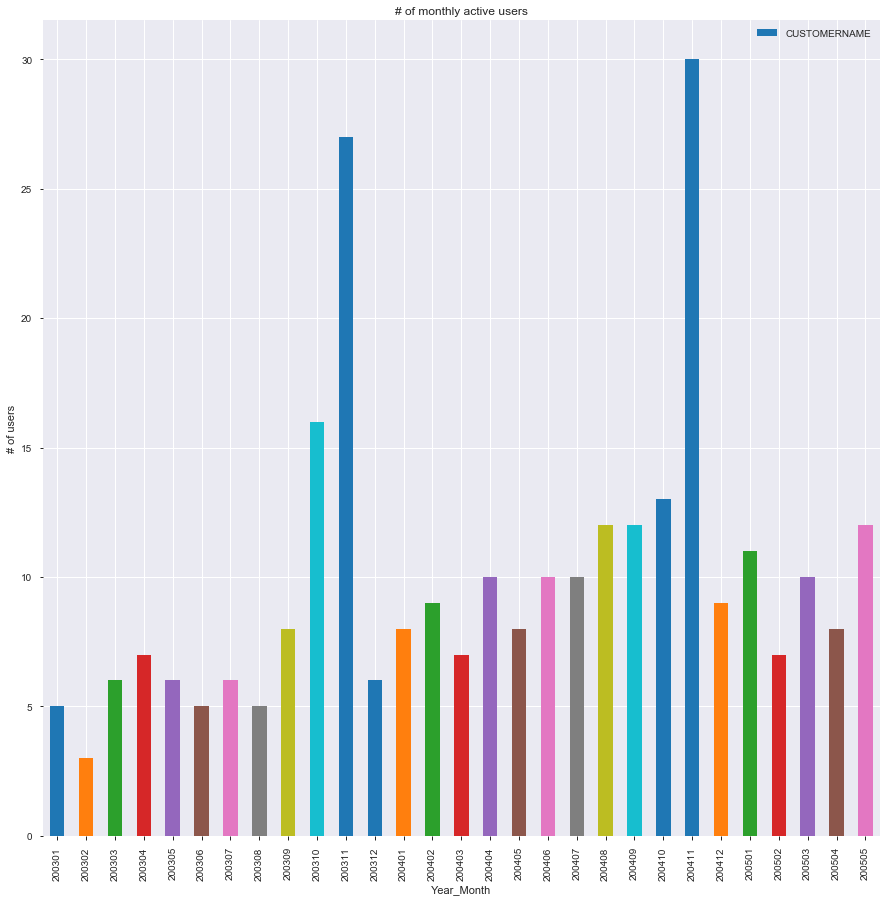

In [157]:
data['Year_Month'] = data["YEAR_ID"].map(str)+data['MONTH_ID'].map(str).map(lambda x : x.rjust(2,'0'))
monthly_active = data.groupby(['Year_Month'])['CUSTOMERNAME'].nunique().reset_index()
monthly_active.plot(kind='bar', x = 'Year_Month', y='CUSTOMERNAME')
plt.title("# of monthly active users")
plt.xlabel("Year_Month")
plt.ylabel("# of users")
plt.xticks(rotation=90)
plt.show()

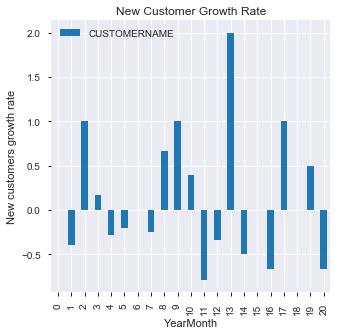

In [205]:
first_purchase = data.groupby(['CUSTOMERNAME']).Year_Month.min().reset_index()
first_purchase.columns = ['CUSTOMERNAME', 'FirstPurchaseDate']
first_purchase.groupby(['FirstPurchaseDate'])['CUSTOMERNAME'].nunique().pct_change().reset_index().plot(kind='bar')
plt.title('New Customer Growth Rate')
plt.xlabel('YearMonth')
plt.ylabel('New customers growth rate')
plt.show()

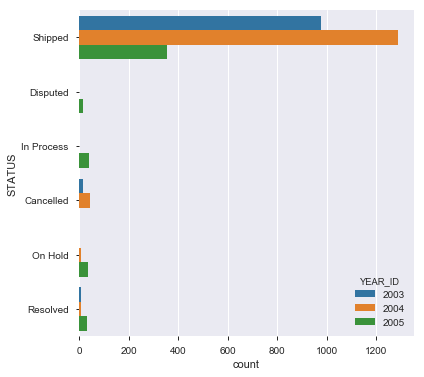

In [45]:
plt.rcParams['figure.figsize'] = [6,6]
sns.countplot(y='STATUS',data=data, hue='YEAR_ID')

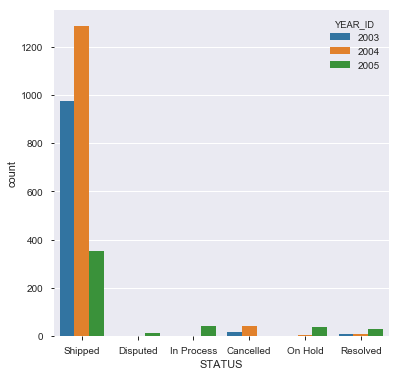

In [44]:
plt.rcParams['figure.figsize'] = [6,6]
sns.countplot(x='STATUS',data=data, hue='YEAR_ID')

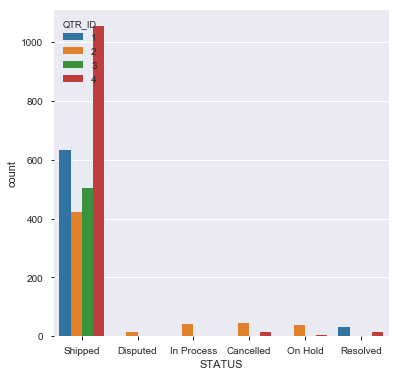

In [46]:
plt.rcParams['figure.figsize'] = [6,6]
sns.countplot(x='STATUS',data=data, hue='QTR_ID')

In [53]:
data1 = data.groupby(['YEAR_ID','QTR_ID']).agg({'SALES': lambda x: x.sum()})
data1

SALES
YEAR_ID QTR_ID            
2003    1        445094.69
        2        562365.22
        3        649514.54
        4       1860005.09
2004    1        833730.68
        2        766260.73
        3       1109396.27
        4       2014774.92
2005    1       1071992.36
        2        719494.35

In [54]:
data1.reset_index(inplace=True)
data1

,YEAR_ID,QTR_ID,SALES
0,2003,1,445094.69
1,2003,2,562365.22
2,2003,3,649514.54
3,2003,4,1860005.09
4,2004,1,833730.68
5,2004,2,766260.73
6,2004,3,1109396.27
7,2004,4,2014774.92
8,2005,1,1071992.36
9,2005,2,719494.35


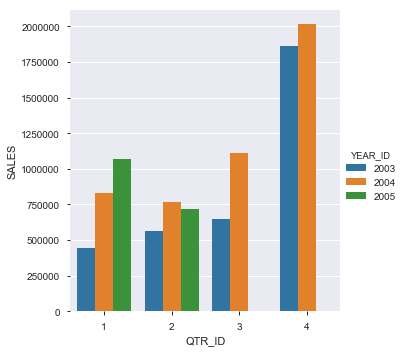

In [56]:
sns.factorplot(y='SALES', x='QTR_ID', data=data1, kind='bar', hue='YEAR_ID')

In [58]:
temp = ['CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE', 'SALES']
rfm_data = data[temp]
rfm_data.shape

(2823, 4)

In [59]:
rfm_data.head(5)

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2/24/2003 0:00,2871.00
1,Reims Collectables,10121,5/7/2003 0:00,2765.90
2,Lyon Souveniers,10134,7/1/2003 0:00,3884.34
3,Toys4GrownUps.com,10145,8/25/2003 0:00,3746.70
4,Corporate Gift Ideas Co.,10159,10/10/2003 0:00,5205.27


In [61]:
rfm_data['ORDERDATE'] = pd.to_datetime(rfm_data['ORDERDATE'])

In [73]:
rfm_data['ORDERDATE'].max()

Timestamp('2005-05-31 00:00:00')

In [64]:
#Use this date to calculate recency

In [66]:
import datetime as dt

now = dt.datetime(2005,5,31)

In [74]:
rfm_table = rfm_data.groupby('CUSTOMERNAME').agg({'ORDERDATE': lambda x: (now-x.max()).days,
                                                 'ORDERNUMBER': lambda x : x.nunique(),
                                                 'SALES': lambda x: x.sum()})

rfm_table['ORDERDATE'] = rfm_table['ORDERDATE'].astype(int)

rfm_table.rename(columns={'ORDERDATE': 'recency',
                         'ORDERNUMBER': 'frequency',
                         'SALES': 'monetary_value'}, inplace=True)

In [76]:
rfm_table.head(10)

,recency,frequency,monetary_value
CUSTOMERNAME,,,
"AV Stores, Co.",195,3,157807.81
Alpha Cognac,64,3,70488.44
Amica Models & Co.,264,2,94117.26
"Anna's Decorations, Ltd",83,4,153996.13
Atelier graphique,187,3,24179.96
"Australian Collectables, Ltd",22,3,64591.46
"Australian Collectors, Co.",183,5,200995.41
"Australian Gift Network, Co",118,3,59469.12
Auto Assoc. & Cie.,232,2,64834.32


In [78]:
#quantile grouping to segment based on RFM
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,80.25,2.0,70129.4325
0.50,185.00,3.0,86522.6100
0.75,229.25,3.0,120575.8750


In [79]:
quantiles = quantiles.to_dict()
quantiles

{'recency': {0.25: 80.25, 0.5: 185.0, 0.75: 229.25},
 'frequency': {0.25: 2.0, 0.5: 3.0, 0.75: 3.0},
 'monetary_value': {0.25: 70129.4325, 0.5: 86522.61, 0.75: 120575.875}}

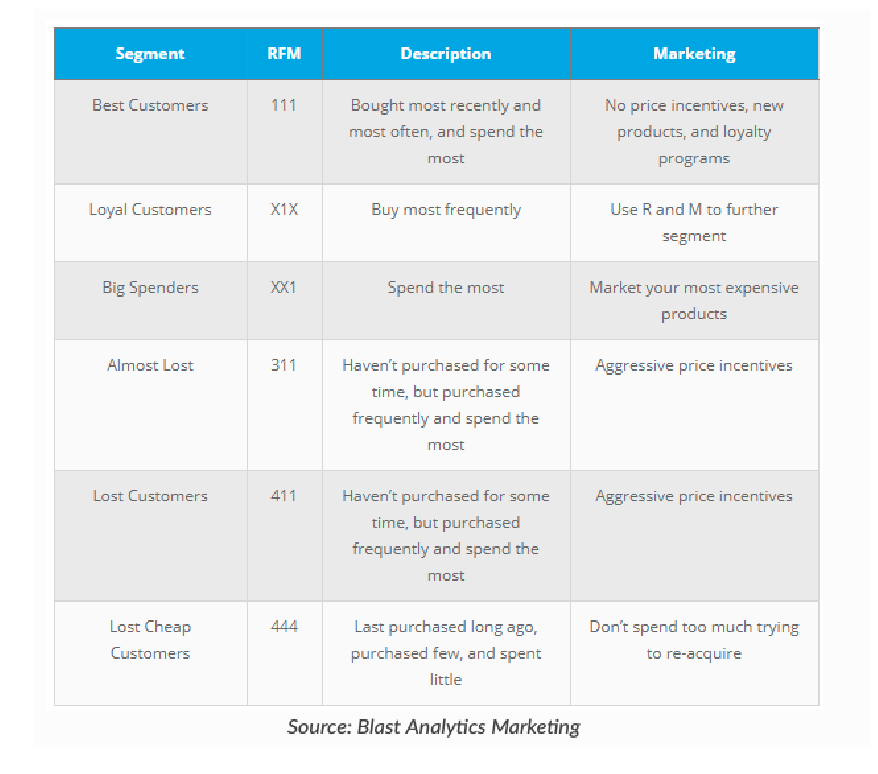

In [90]:
import cv2
plt.rcParams['figure.figsize'] = [15,15]
a = cv2.imread('../../RFM.png')
img = a[:,:,::-1]
plt.grid(False)
plt.axis('off')
plt.imshow(img)

In [91]:
#x = value, p= recency, monetary, frequency, d = quantiles dictionary
rfm_segment = rfm_table.copy()

def R_segment(x, p, d):
    if x <= d[p][0.25]:
        return 1
    if x <= d[p][0.5]:
        return 2
    if x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FM_segment(x, p, d):
    if x <= d[p][0.25]:
        return 4
    if x <= d[p][0.5]:
        return 3
    if x <= d[p][0.75]:
        return 2
    else:
        return 1

In [93]:
rfm_segment['R_Quartile'] = rfm_segment['recency'].apply(R_segment, args=('recency',quantiles,))
rfm_segment['F_Quartile'] = rfm_segment['frequency'].apply(FM_segment, args=('frequency',quantiles,))
rfm_segment['M_Quartile'] = rfm_segment['monetary_value'].apply(FM_segment, args=('monetary_value',quantiles,))

In [95]:
rfm_segment['RFMClass'] = rfm_segment.R_Quartile.map(str)+rfm_segment.F_Quartile.map(str)+rfm_segment.M_Quartile.map(str)

In [96]:
rfm_segment.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",195,3,157807.81,3,3,1,331
Alpha Cognac,64,3,70488.44,1,3,3,133
Amica Models & Co.,264,2,94117.26,4,4,2,442
"Anna's Decorations, Ltd",83,4,153996.13,2,1,1,211
Atelier graphique,187,3,24179.96,3,3,4,334


In [97]:
# best customers
rfm_segment[rfm_segment['RFMClass']=='111'].sort_values('recency',ascending=True).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Euro Shopping Channel,0,26,912294.11,1,1,1,111
La Rochelle Gifts,0,4,180124.90,1,1,1,111
Diecast Classics Inc.,1,4,122138.14,1,1,1,111
Mini Gifts Distributors Ltd.,2,17,654858.06,1,1,1,111
Souveniers And Things Co.,2,4,151570.98,1,1,1,111


In [101]:
# low recency customers are at the verge of churning 
# the annual percentage rate at which customers stop subscribing to a service or employees leave a job

rfm_segment[rfm_segment['R_Quartile']>=3].sort_values('monetary_value',ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Land of Toys Inc.,197,4,164069.44,3,1,1,311
"AV Stores, Co.",195,3,157807.81,3,3,1,331
"Saveley & Henriot, Co.",455,3,142874.25,4,3,1,431
Rovelli Gifts,200,3,137955.72,3,3,1,331
Online Diecast Creations Co.,208,3,131685.30,3,3,1,331


In [102]:
# lost customers
rfm_segment[rfm_segment['RFMClass']=='444'].sort_values('recency',ascending=True).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Auto Assoc. & Cie.,232,2,64834.32,4,4,4,444
"Iberia Gift Imports, Corp.",237,2,54723.62,4,4,4,444
"Clover Collections, Co.",257,2,57756.43,4,4,4,444
"Bavarian Collectables Imports, Co.",258,1,34993.92,4,4,4,444
Online Mini Collectables,263,2,57197.96,4,4,4,444


In [105]:
#loyal
# high frequency
rfm_segment[rfm_segment['F_Quartile']==1].sort_values('frequency',ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Euro Shopping Channel,0,26,912294.11,1,1,1,111
Mini Gifts Distributors Ltd.,2,17,654858.06,1,1,1,111
Reims Collectables,62,5,135042.94,1,1,1,111
Danish Wholesale Imports,46,5,145041.60,1,1,1,111
"Dragon Souveniers, Ltd.",90,5,172989.68,2,1,1,211


In [106]:
# big spenders
# high monetary value
rfm_segment[rfm_segment['M_Quartile']==1].sort_values('monetary_value',ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Euro Shopping Channel,0,26,912294.11,1,1,1,111
Mini Gifts Distributors Ltd.,2,17,654858.06,1,1,1,111
"Australian Collectors, Co.",183,5,200995.41,2,1,1,211
Muscle Machine Inc,181,4,197736.94,2,1,1,211
La Rochelle Gifts,0,4,180124.90,1,1,1,111


# Future Work

Now we have done the RFM Analysis, and we can further build customer personas by summary stats of RFM values.

Now I will explore forecasting the revenue using time series analysis

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA

In [213]:
data['ORDERDATE'] = data['ORDERDATE'].astype('datetime64[ns]')
data['ORDERDATE'].max(), data['ORDERDATE'].min()

(Timestamp('2005-05-31 00:00:00'), Timestamp('2003-01-06 00:00:00'))

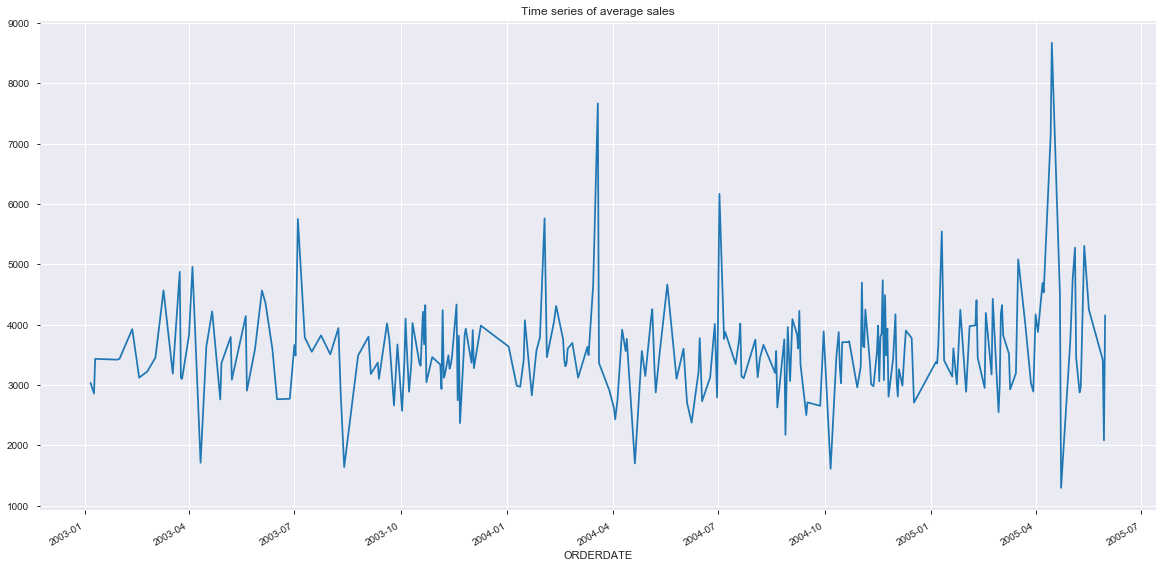

In [217]:

mean_group = data.groupby(["ORDERDATE"]).mean()['SALES']
plt.figure(figsize=(20,10))
mean_group.plot()
plt.title("Time series of average sales")
plt.show()

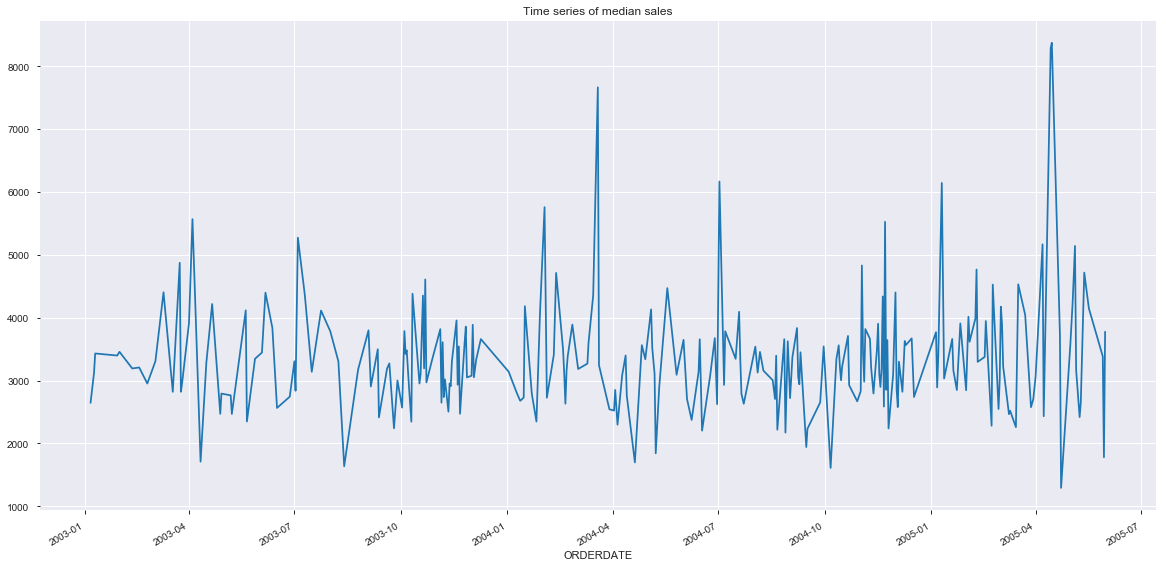

In [218]:
median_group = data.groupby(["ORDERDATE"]).median()['SALES']
plt.figure(figsize=(20,10))
median_group.plot()
plt.title("Time series of median sales")
plt.show()

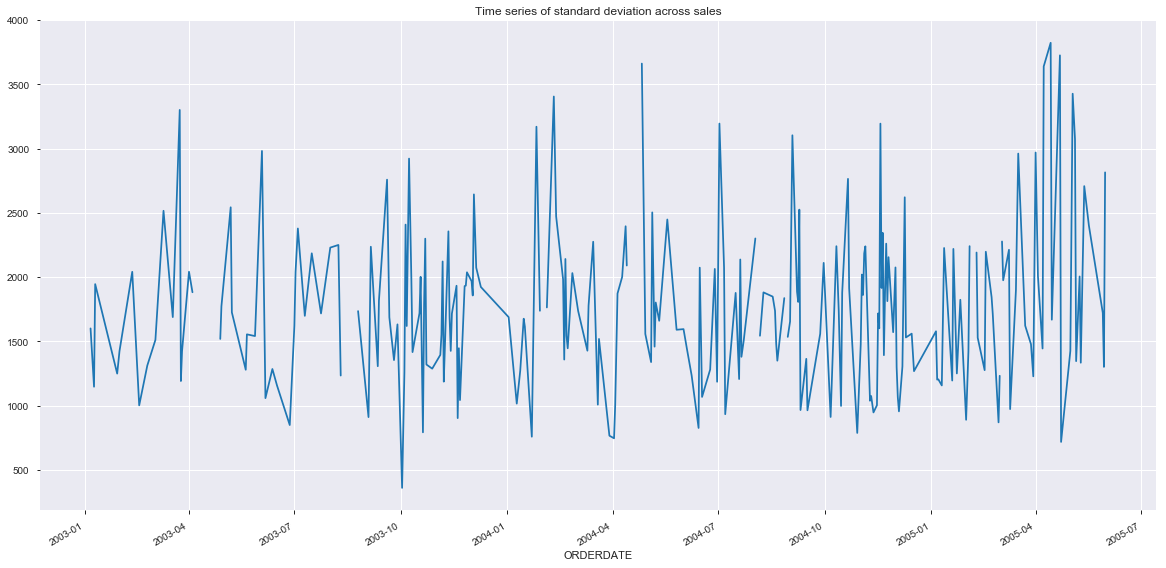

In [219]:
std_group = data.groupby(["ORDERDATE"]).std()['SALES']
plt.figure(figsize=(20,10))
std_group.plot()
plt.title("Time series of standard deviation across sales")
plt.show()

In [225]:
forecast = data[['ORDERDATE','SALES']]
forecast = forecast.sort_values('ORDERDATE').reset_index()
forecast = forecast.drop(columns=['index'])
forecast['ORDERDATE'] = forecast['ORDERDATE'].astype('datetime64[ns]')
forecast.head(5)

,ORDERDATE,SALES
0,2003-01-06,5151.00
1,2003-01-06,3390.00
2,2003-01-06,1903.22
3,2003-01-06,1689.03
4,2003-01-09,1404.00


In [226]:
forecast['ORDERDATE'].max(), forecast['ORDERDATE'].min()

(Timestamp('2005-05-31 00:00:00'), Timestamp('2003-01-06 00:00:00'))

In [227]:
len(forecast)

2823

In [229]:
forecast.set_index("ORDERDATE", inplace=True)

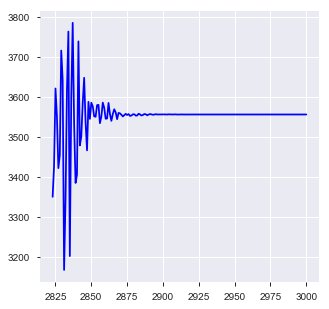

In [236]:
model = AR(forecast)
model = model.fit()

pred = model.predict(start = 2823, end = 3000)

pred.columns = ['SALES']
#pred.head()

pred.plot(color='blue',label='predicted');

In [237]:
model2 = ARMA(forecast['SALES'], order=(2,1))
model2 = model2.fit(disp=False)

pred2 = model2.predict(start=2823, end=3000)

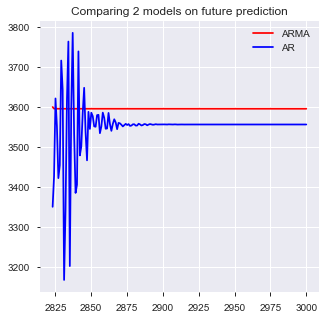

In [243]:
pred2.plot(color='red', label='ARMA')
pred.plot(color='blue', label='AR')
plt.legend(loc='best')
plt.title("Comparing 2 models on future prediction")
plt.show(block=False)

<Figure size 720x576 with 0 Axes>

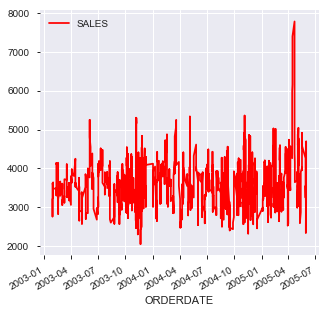

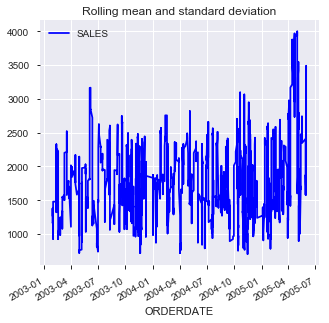

In [247]:
mvg_avg = forecast.rolling(window=12).mean()
mvg_std = forecast.rolling(window=12).std()
plt.figure(figsize=(10,8))
mvg_avg.plot(color='red', label='Rolling Mean')
mvg_std.plot(color='blue', label="Rolling Standard Deviation")
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

In [250]:
y = forecast['SALES'].resample('MS').mean()
forecast['2003':].head()

,SALES
ORDERDATE,
2003-01-06,5151.00
2003-01-06,3390.00
2003-01-06,1903.22
2003-01-06,1689.03
2003-01-09,1404.00


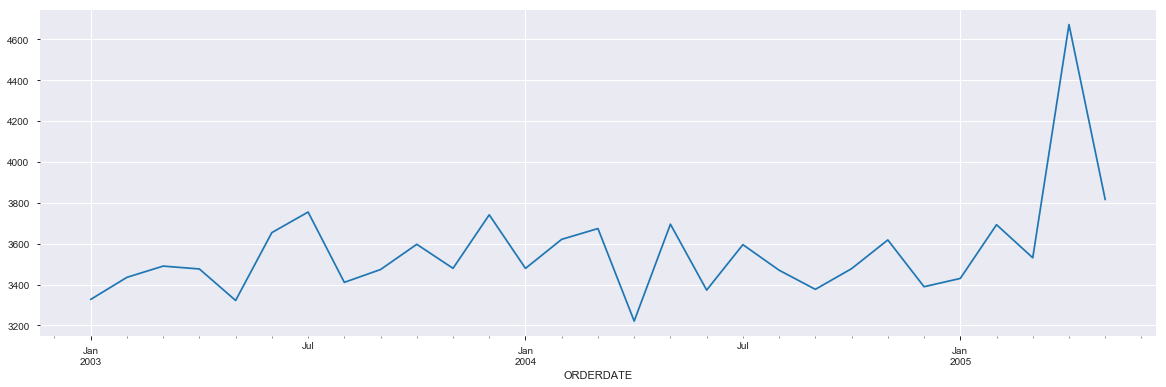

In [251]:
y.plot(figsize=(20,6))